<a href="https://colab.research.google.com/github/Ignatenko92/-/blob/main/codecompozit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("default", category=FutureWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
print(tf.__version__)

2.12.0


**АНАЛИЗ ДАТАСЕТА.ОБЩАЯ ОЦЕНКА СОДЕРЖИМОГО**

In [ ]:
# файлы в прямой видимости программы
df1 = pd.read_excel('X_bp.xlsx') 
df2 = pd.read_excel('X_nup.xlsx')
# вывод размерностей
df1.shape,df2.shape 

((1023, 11), (1040, 4))

In [ ]:
# объединяем датасеты
df = pd.merge(df1,df2)
# устраняем строки для которых не нашлось индекса (один датасет больше другого)
df.dropna(inplace = True)
df.head()

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0         0.0                         1.857143            2030.0   
1         1.0                         1.857143            2030.0   
2         2.0                         1.857143            2030.0   
3         3.0                         1.857143            2030.0   
4         4.0                         2.771331            2030.0   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0             738.736842                        30.00   
1             738.736842                        50.00   
2             738.736842                        49.90   
3             738.736842                       129.00   
4             753.000000                       111.86   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                        22.267857                100.000000   
1                        23.750000                284.615385   
2                        33.000000                284.615385   
3                        21.250000                300.000000   
4                        22.267857                284.615385   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          210.0                                  70.0   
1                          210.0                                  70.0   
2                          210.0                                  70.0   
3                          210.0                                  70.0   
4                          210.0                                  70.0   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки, град  \
0                         3000.0                    220.0                 0.0   
1                         3000.0                    220.0                 0.0   
2                         3000.0                    220.0                 0.0   
3                         3000.0                    220.0                 0.0   
4                         3000.0                    220.0                 0.0   

   Шаг нашивки  Плотность нашивки  
0          4.0               57.0  
1          4.0               60.0  
2          4.0               70.0  
3          5.0               47.0  
4          5.0               57.0

In [ ]:
df.shape,df.columns

((1023, 14),
 Index(['Unnamed: 0', 'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
        'модуль упругости, ГПа', 'Количество отвердителя, м.%',
        'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
        'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
        'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
        'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
       dtype='object'))

In [ ]:
df.drop('Unnamed: 0',axis = 1, inplace = True)
print(df.shape)
df.head(1)

(1023, 13)


Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                         30.0                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                     100.0                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                 0.0          4.0               57.0

**АНАЛИЗ** **ТАБЛИЦЫ**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

Описательная статистика 



In [ ]:
df.describe() # or 
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

**ПОДСЧЕТ УНИКАЛЬНЫХ ЗНАЧЕНИЙ ПО СТОЛБЦАМ**

---


In [ ]:
df.nunique()
# для просмотра наличия дуликатов df.duplicated().sum()
# маска с пропущенными значениями df.isna()
# подсчет пропущенных значений df.isna().sum()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

## Разведочный Анализ (EDA)

Гистограммы

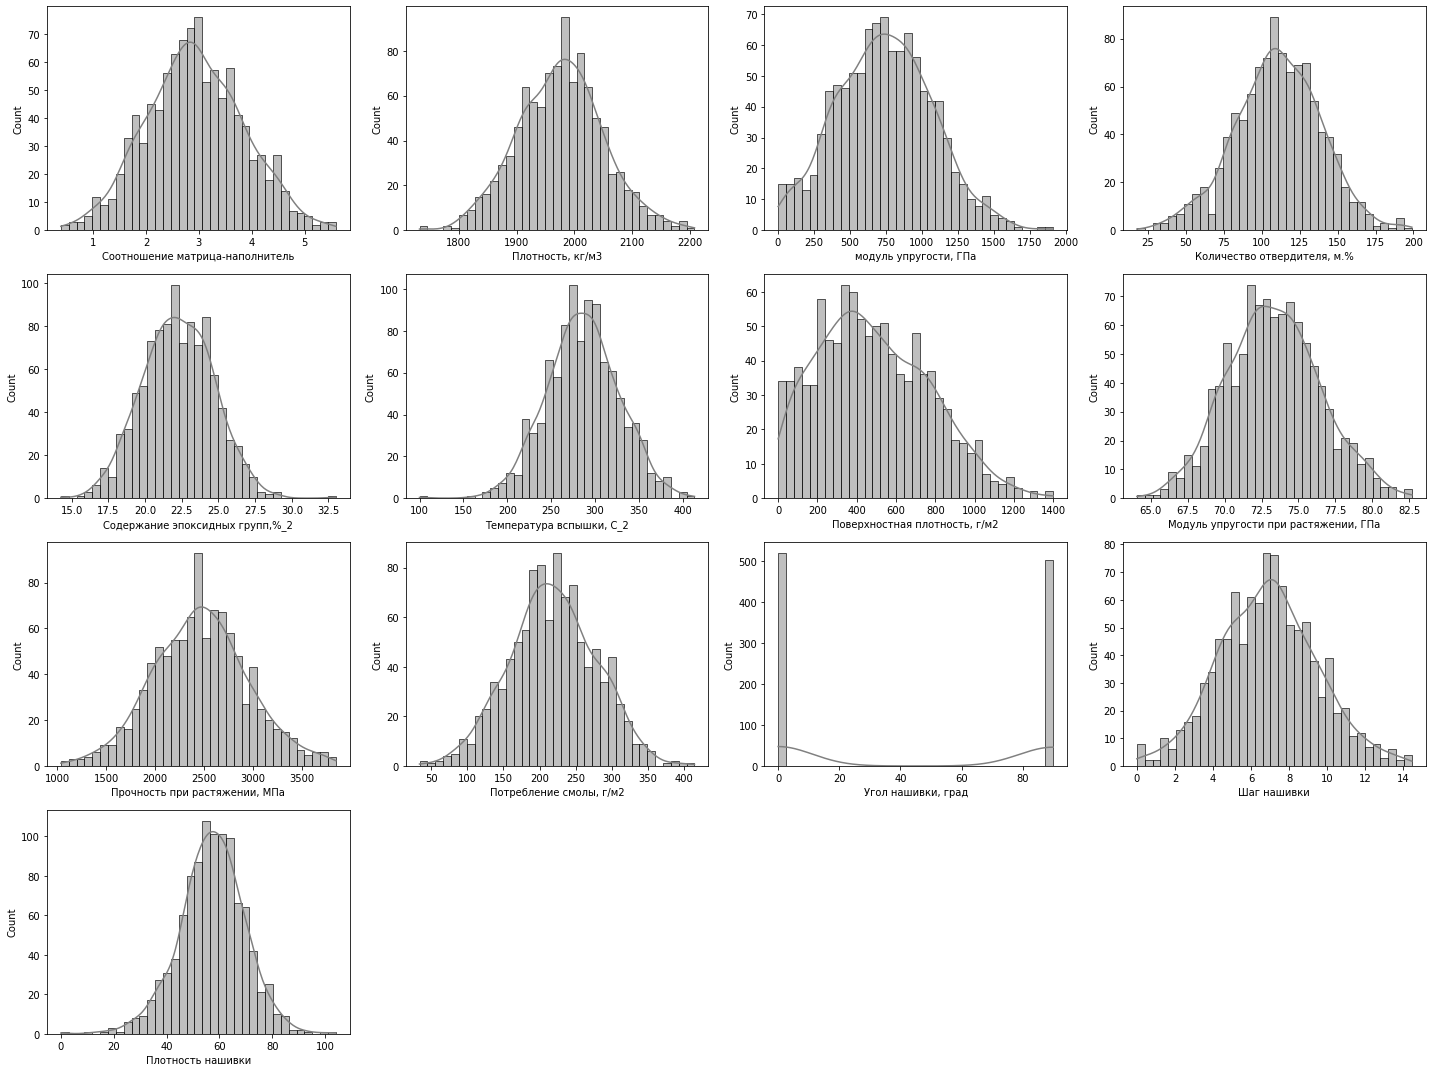

In [ ]:
from matplotlib.colorbar import colorbar_factory
def histogram (df, n_rows, n_cols):
    fig=plt.figure(figsize=(20, 15))
    for i, column in enumerate(df.columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.histplot(data=df, x=column, kde=True, bins=35, color = 'grey')
    fig.tight_layout()
    plt.show()

histogram(df, 4, 4)

Попарные графики рассеяния

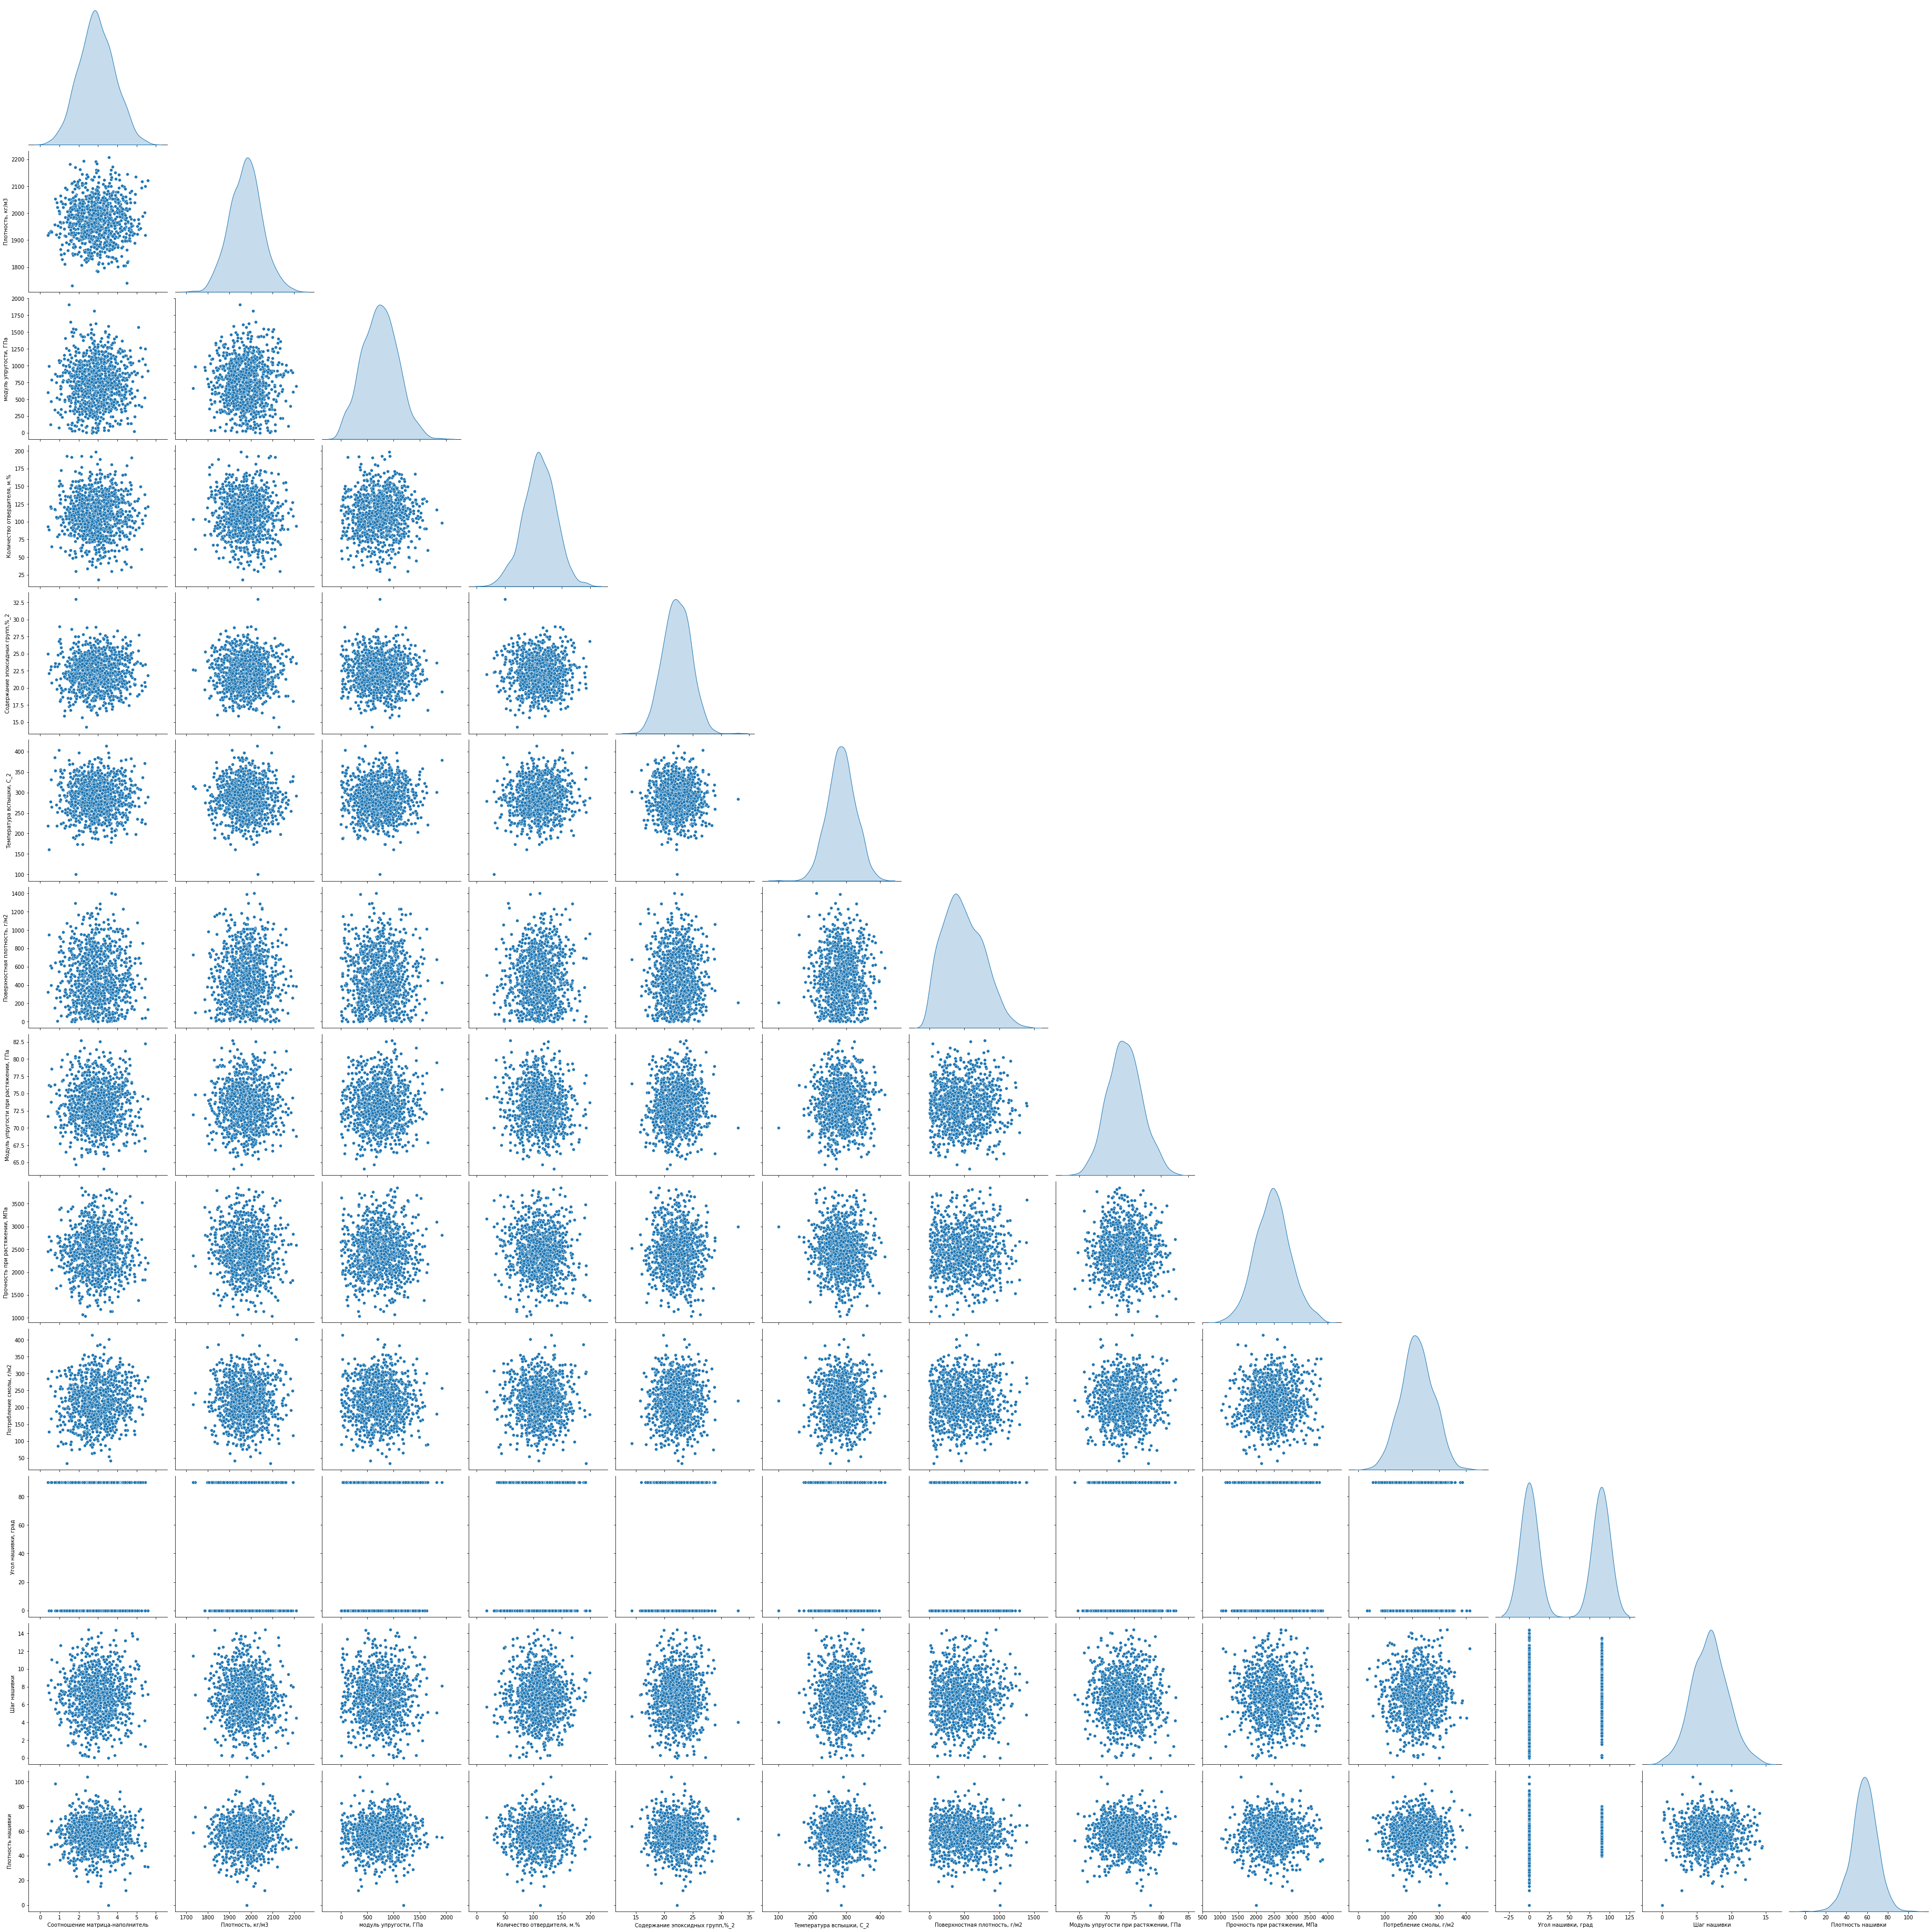

In [ ]:
sns.pairplot(df, height=4, diag_kind='kde', corner = True);

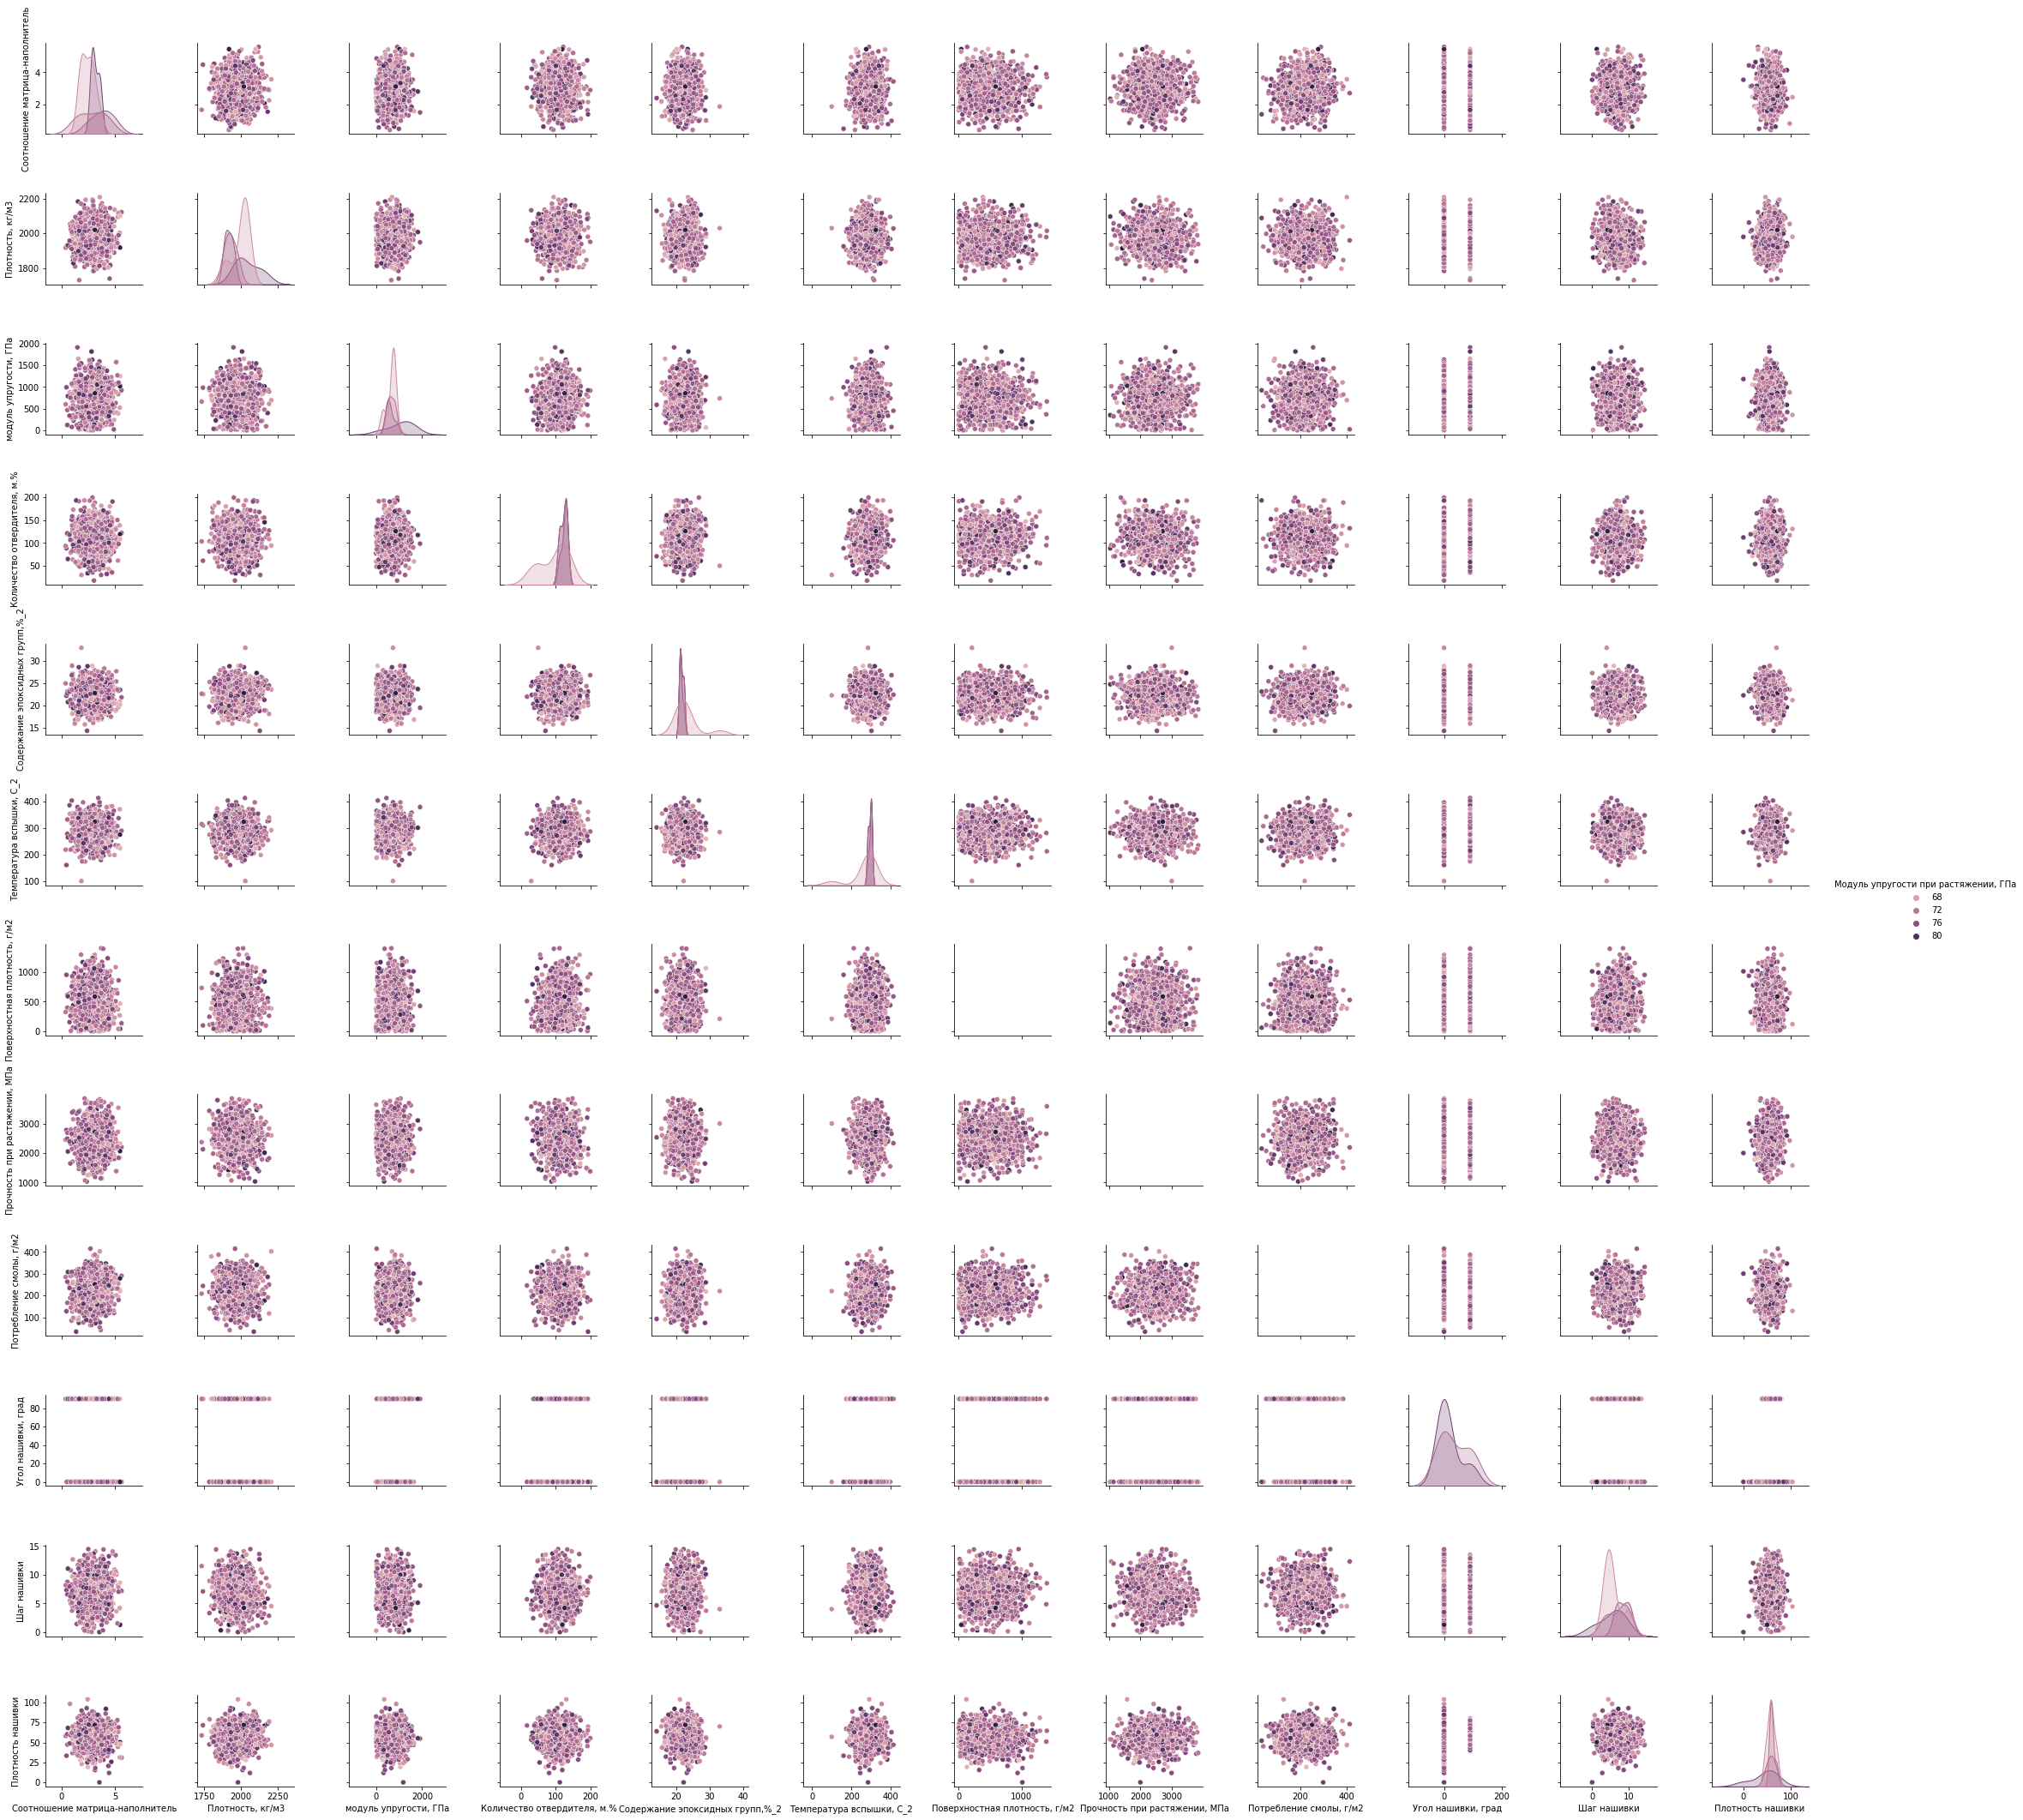

In [ ]:
# дополнительные графики попарного рассевиваения  в привязке к целевой переменной
sns.pairplot(df, hue="Модуль упругости при растяжении, ГПа")


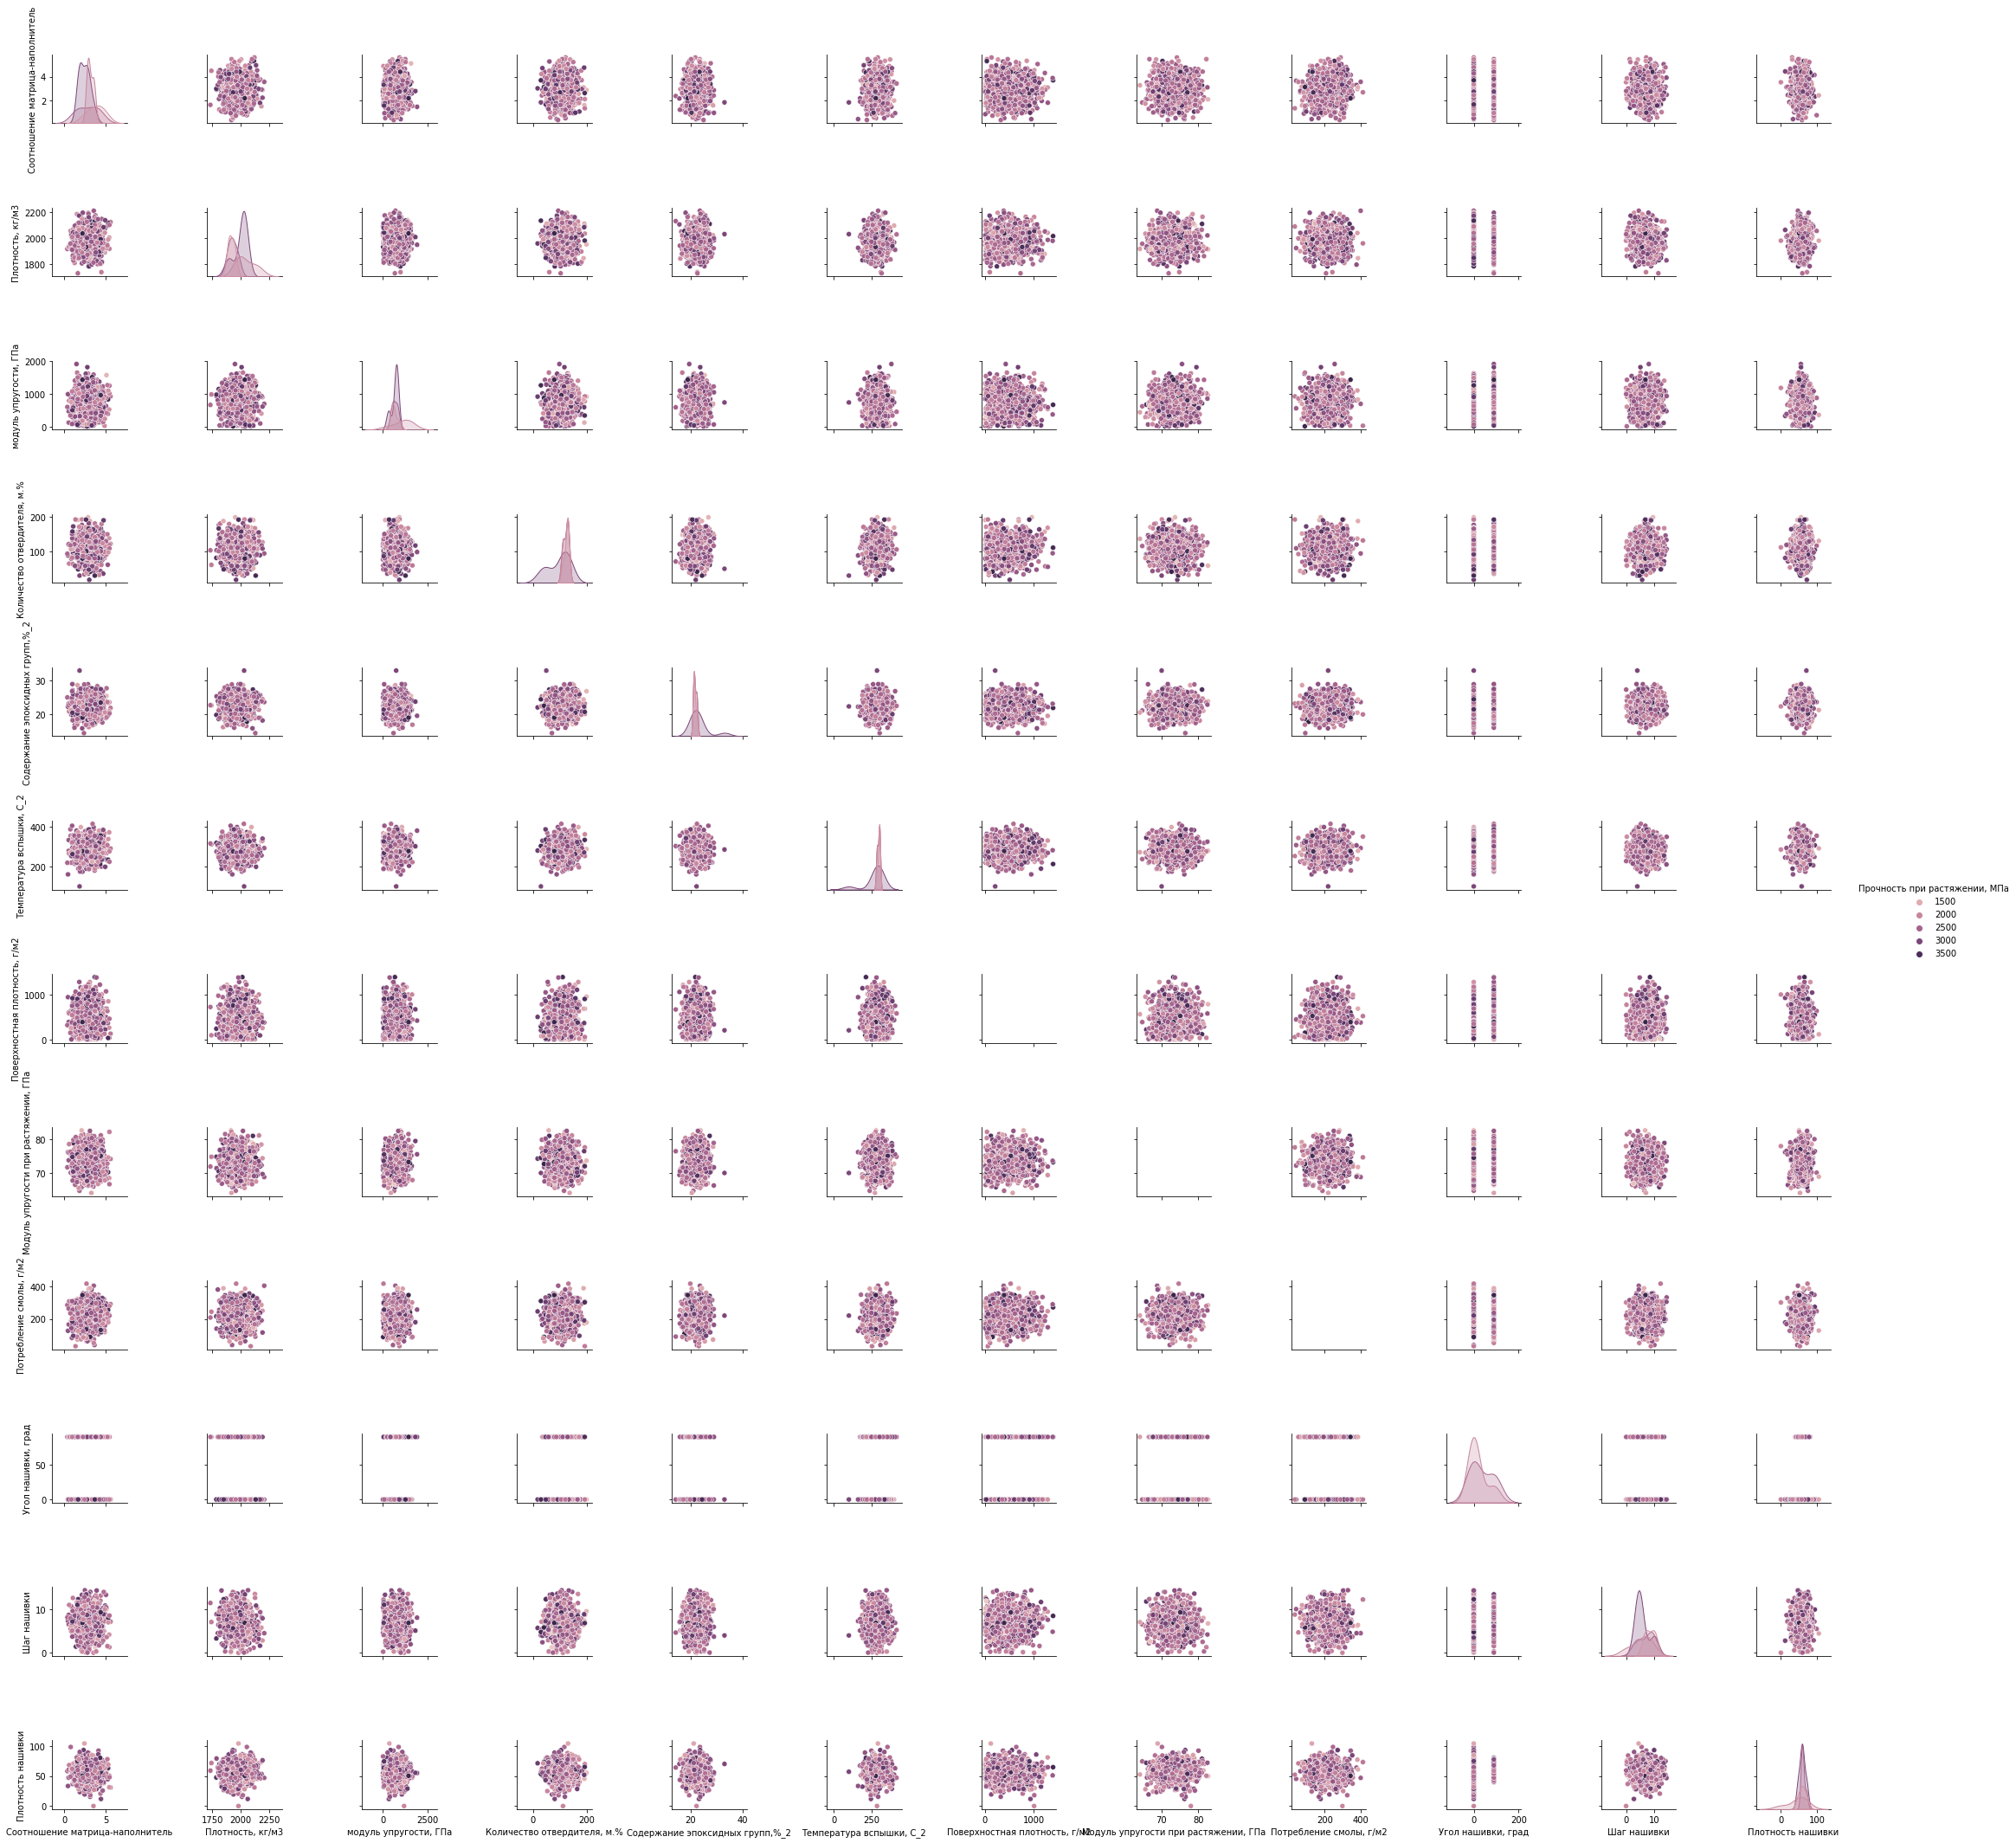

In [ ]:
# дополнительные графики попарного рассевиваения  в привязке к целевой переменной
sns.pairplot(df, hue="Прочность при растяжении, МПа")

Матрица корреляции

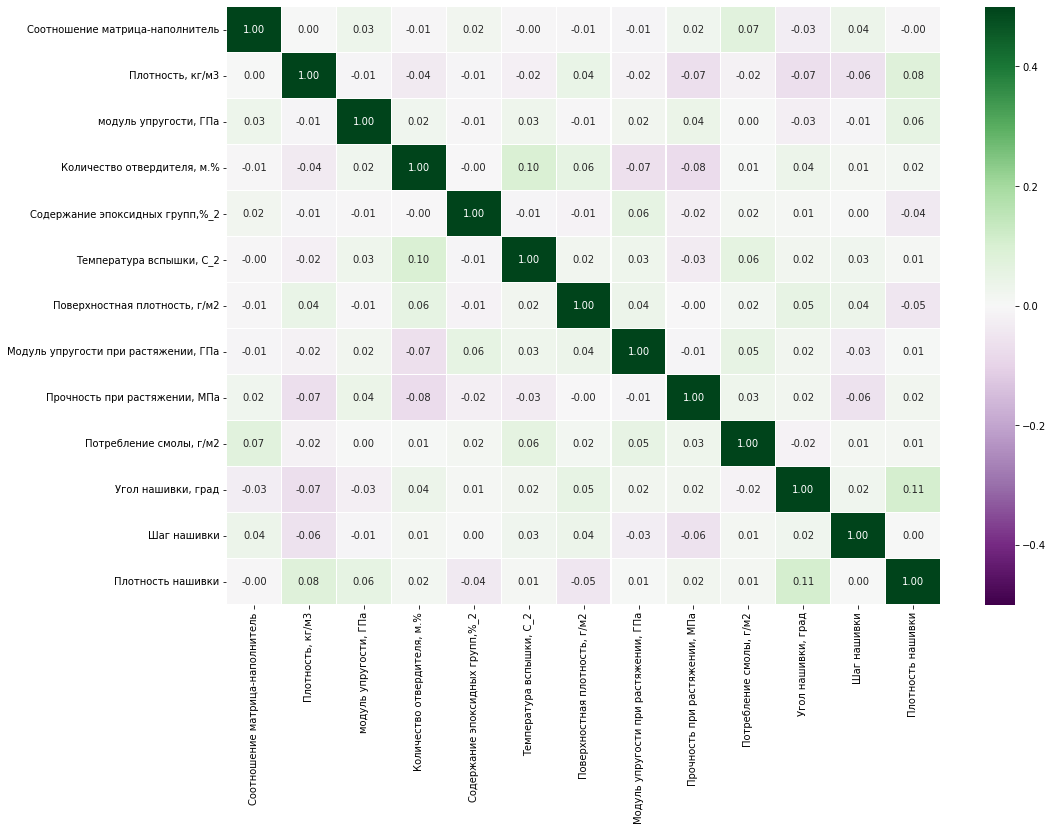

In [ ]:
def get_corr(df):
  corr = df.corr()
  fig, ax = plt.subplots(figsize=(16, 11))
  sns.heatmap(corr, vmin=-0.5, vmax=0.5, annot=True, fmt='.2f',cmap='PRGn', ax=ax, linewidths = 0.1)
  plt.show()
get_corr(df)

Диаграмма "Ящик с усами" (Boxplot)

In [ ]:
''' в данном случае блок мало информативен
def box_pl1(df):
  columns = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
          'модуль упругости, ГПа', 'Количество отвердителя, м.%',
          'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
          'Поверхностная плотность, г/м2', 
          'Потребление смолы, г/м2',
          'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']
  fig, axs = plt.subplots(ncols=12, figsize=(32,9))
  for i, column in enumerate(df[columns]):
    sns.boxplot(data=df, x=column, y='Модуль упругости при растяжении, ГПа', ax=axs[i])


  fig, axs = plt.subplots(ncols=12, figsize=(32,9))
  for i, column in enumerate(df[columns]):
    sns.boxplot(data=df, x=column, y='Прочность при растяжении, МПа', ax=axs[i])
box_pl1(df) '''

" в данном случае блок мало информативен\ndef box_pl1(df):\n  columns = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3',\n          'модуль упругости, ГПа', 'Количество отвердителя, м.%',\n          'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',\n          'Поверхностная плотность, г/м2', \n          'Потребление смолы, г/м2',\n          'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']\n  fig, axs = plt.subplots(ncols=12, figsize=(32,9))\n  for i, column in enumerate(df[columns]):\n    sns.boxplot(data=df, x=column, y='Модуль упругости при растяжении, ГПа', ax=axs[i])\n\n\n  fig, axs = plt.subplots(ncols=12, figsize=(32,9))\n  for i, column in enumerate(df[columns]):\n    sns.boxplot(data=df, x=column, y='Прочность при растяжении, МПа', ax=axs[i])\nbox_pl1(df) "

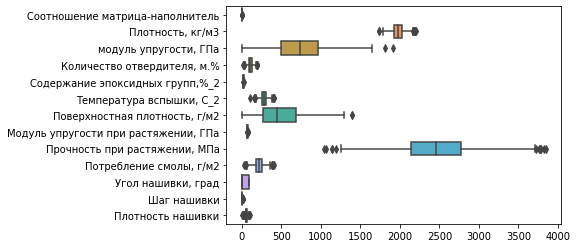

In [ ]:
# box_plot на маленьком поле
def box_plt3(df):
  sns.boxplot(data = df, orient="h")
  plt.show()
box_plt3(df)

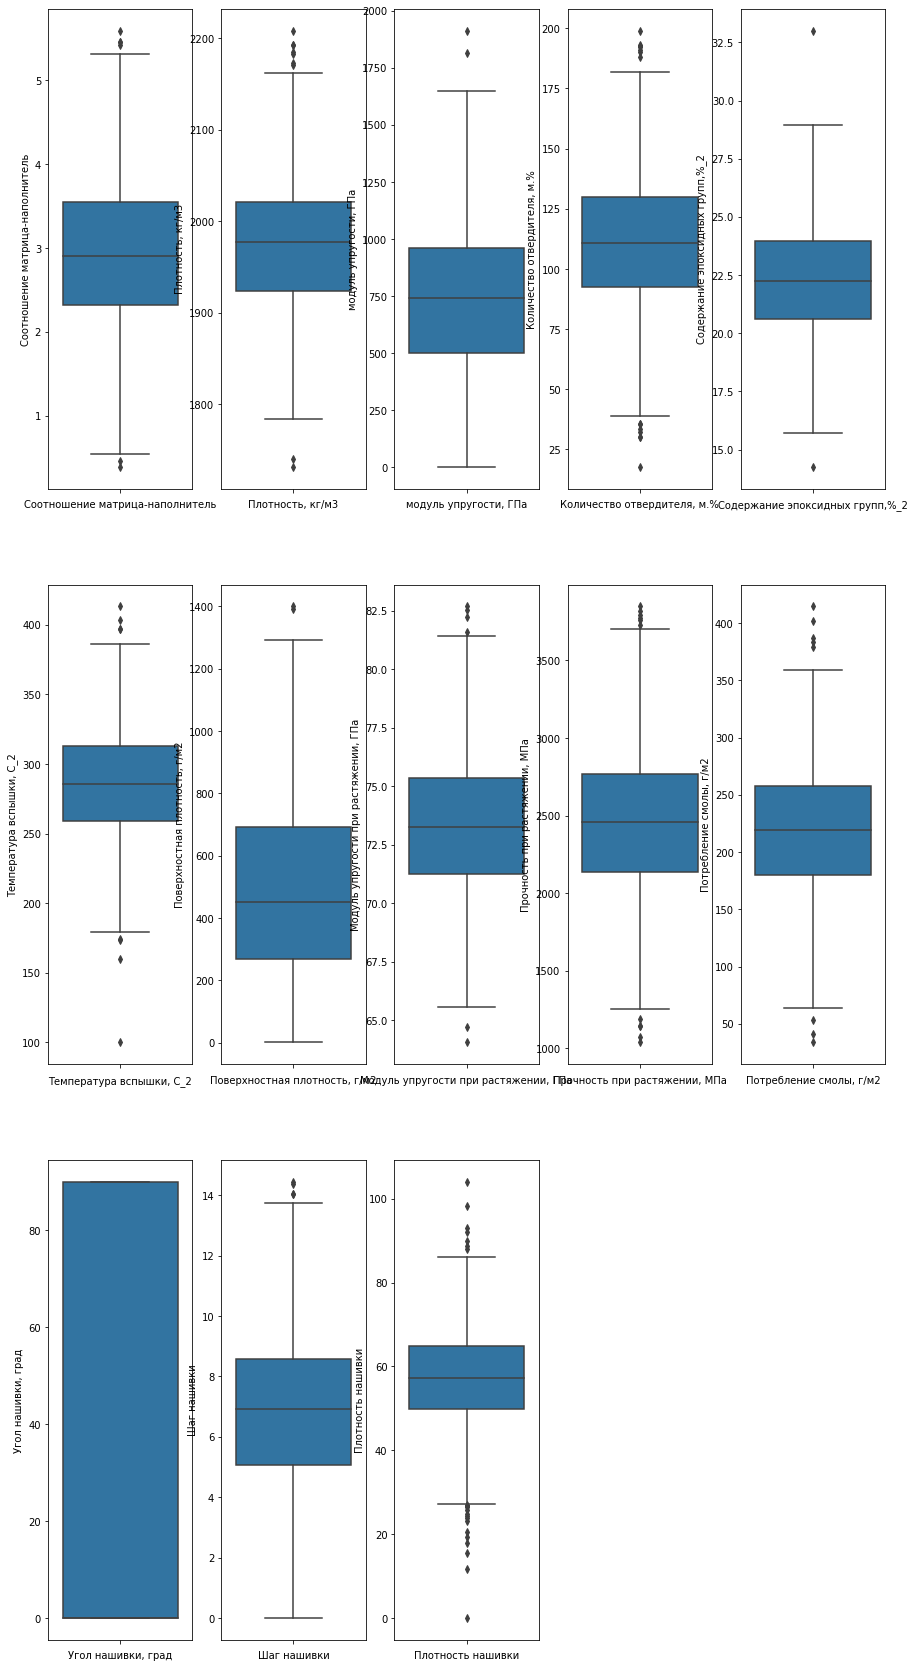

In [ ]:
# box plot раздельный
def box_pl2(df):
  col = 5  # столбцы
  k = 1  # счетчик
  row = 3  # строки

  fig = plt.figure(figsize=(15, 30))

  for i in df.columns:
      plt.subplot(row, col, k)
      plt.xlabel(i)
      sns.boxplot(y = df[i])
      k+=1
    
  plt.show()
box_pl2(df)

Удаление выбросов методом межквартильных расстояний

In [ ]:
for i in df.columns:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan
df.dropna(inplace = True)

"Ящик с усами" после удаления выбросов

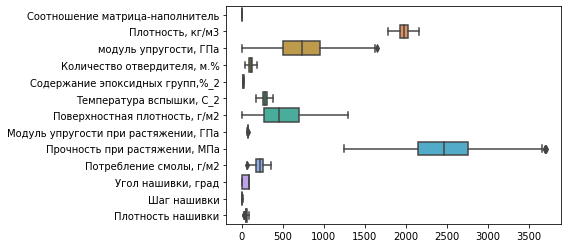

In [ ]:
# box_pl2(df)
sns.boxplot(data = df, orient="h")
plt.show()

In [ ]:
df.shape

(936, 13)

Оценка плотности ядра

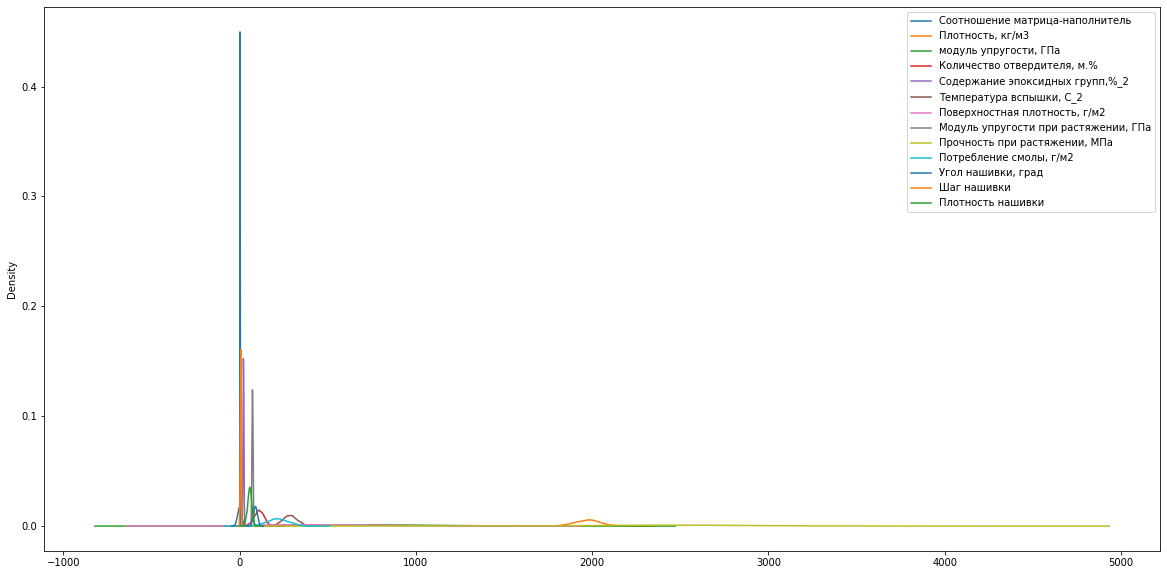

In [ ]:
def plt_kde(df):
  fig, ax = plt.subplots(figsize=(20, 10))
  df.plot(kind='kde', ax=ax)
plt_kde(df)

Нормализуем

In [ ]:
scaler = preprocessing.MinMaxScaler()
columns = df.columns
df_n = scaler.fit_transform(np.array(df))
df_n = pd.DataFrame(df_n, columns=columns)
df_n.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         0.274768          0.651097               0.447061   
1                         0.274768          0.651097               0.447061   
2                         0.466552          0.651097               0.455721   
3                         0.465836          0.571539               0.452685   
4                         0.424236          0.332865               0.488508   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     0.079153                         0.607435   
1                     0.630983                         0.418887   
2                     0.511257                         0.495653   
3                     0.511257                         0.495653   
4                     0.511257                         0.495653   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.509164                        0.16223   
1                  0.583596                        0.16223   
2                  0.509164                        0.16223   
3                  0.509164                        0.16223   
4                  0.509164                        0.16223   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                              0.280303                        0.71259   
1                              0.280303                        0.71259   
2                              0.280303                        0.71259   
3                              0.280303                        0.71259   
4                              0.280303                        0.71259   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 0.529221                 0.0     0.289334           0.557156  
1                 0.529221                 0.0     0.362355           0.335840  
2                 0.529221                 0.0     0.362355           0.506083  
3                 0.529221                 0.0     0.362355           0.557156  
4                 0.529221                 0.0     0.362355           0.727399

In [ ]:
scaler.inverse_transform(np.array(df_n)[:1,:])

array([[1.85714286e+00, 2.03000000e+03, 7.38736842e+02, 5.00000000e+01,
        2.37500000e+01, 2.84615385e+02, 2.10000000e+02, 7.00000000e+01,
        3.00000000e+03, 2.20000000e+02, 0.00000000e+00, 4.00000000e+00,
        6.00000000e+01]])

Описательная статистика характеристик после нормализации

In [ ]:
df_n.describe().T.round(2)

count  mean   std  min   25%   50%  \
Соотношение матрица-наполнитель       936.0  0.50  0.19  0.0  0.37  0.49   
Плотность, кг/м3                      936.0  0.50  0.19  0.0  0.37  0.51   
модуль упругости, ГПа                 936.0  0.45  0.20  0.0  0.30  0.45   
Количество отвердителя, м.%           936.0  0.50  0.19  0.0  0.38  0.51   
Содержание эпоксидных групп,%_2       936.0  0.49  0.18  0.0  0.37  0.49   
Температура вспышки, С_2              936.0  0.52  0.19  0.0  0.39  0.52   
Поверхностная плотность, г/м2         936.0  0.37  0.22  0.0  0.21  0.35   
Модуль упругости при растяжении, ГПа  936.0  0.49  0.19  0.0  0.36  0.49   
Прочность при растяжении, МПа         936.0  0.50  0.19  0.0  0.37  0.49   
Потребление смолы, г/м2               936.0  0.52  0.20  0.0  0.39  0.52   
Угол нашивки, град                    936.0  0.51  0.50  0.0  0.00  1.00   
Шаг нашивки                           936.0  0.50  0.18  0.0  0.37  0.50   
Плотность нашивки                     936.0  0.51  0.19  0.0  0.39  0.52   

                                       75%  max  
Соотношение матрица-наполнитель       0.63  1.0  
Плотность, кг/м3                      0.62  1.0  
модуль упругости, ГПа                 0.58  1.0  
Количество отвердителя, м.%           0.64  1.0  
Содержание эпоксидных групп,%_2       0.62  1.0  
Температура вспышки, С_2              0.65  1.0  
Поверхностная плотность, г/м2         0.54  1.0  
Модуль упругости при растяжении, ГПа  0.62  1.0  
Прочность при растяжении, МПа         0.61  1.0  
Потребление смолы, г/м2               0.65  1.0  
Угол нашивки, град                    1.00  1.0  
Шаг нашивки                           0.62  1.0  
Плотность нашивки                     0.64  1.0

Оценим ящик с усами после нормализации

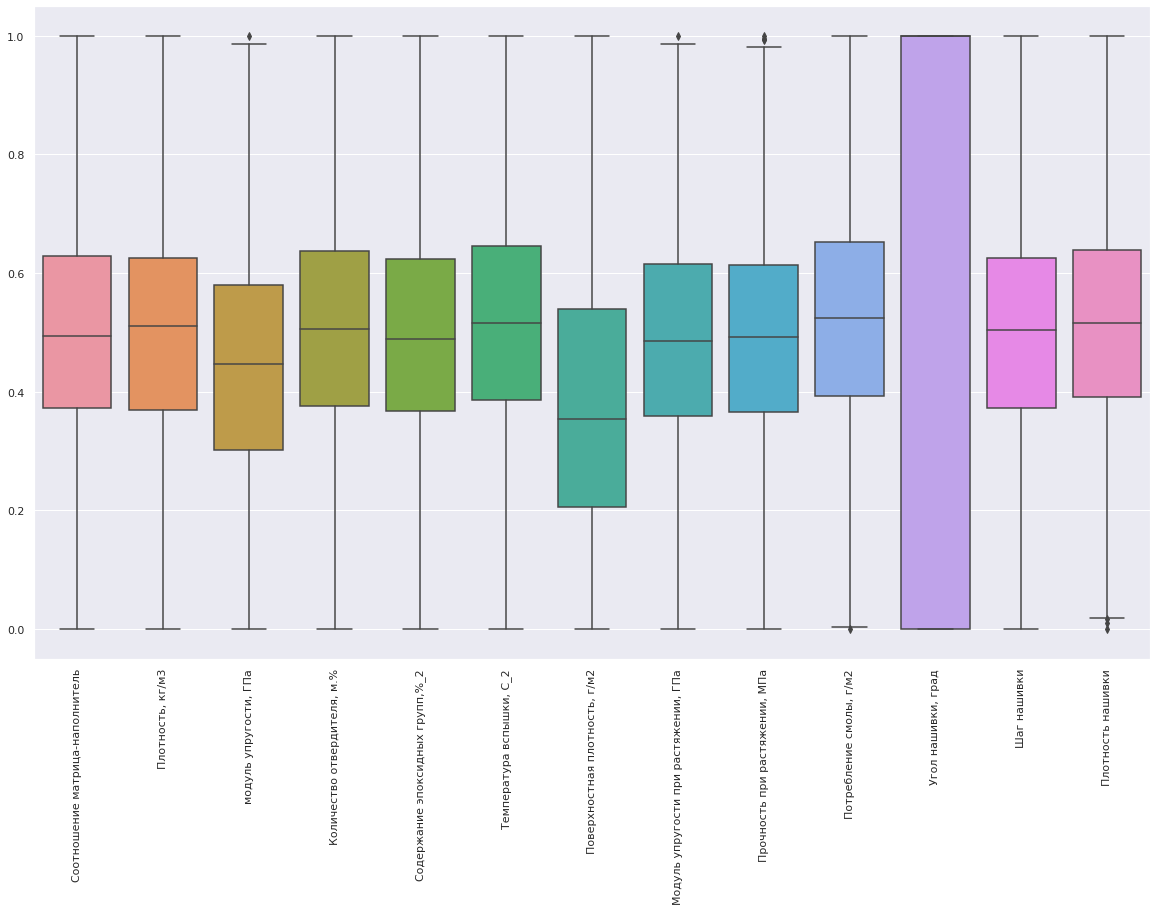

In [ ]:
sns.set(rc={'figure.figsize':(20,12)})
ax = sns.boxplot(data=df_n)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

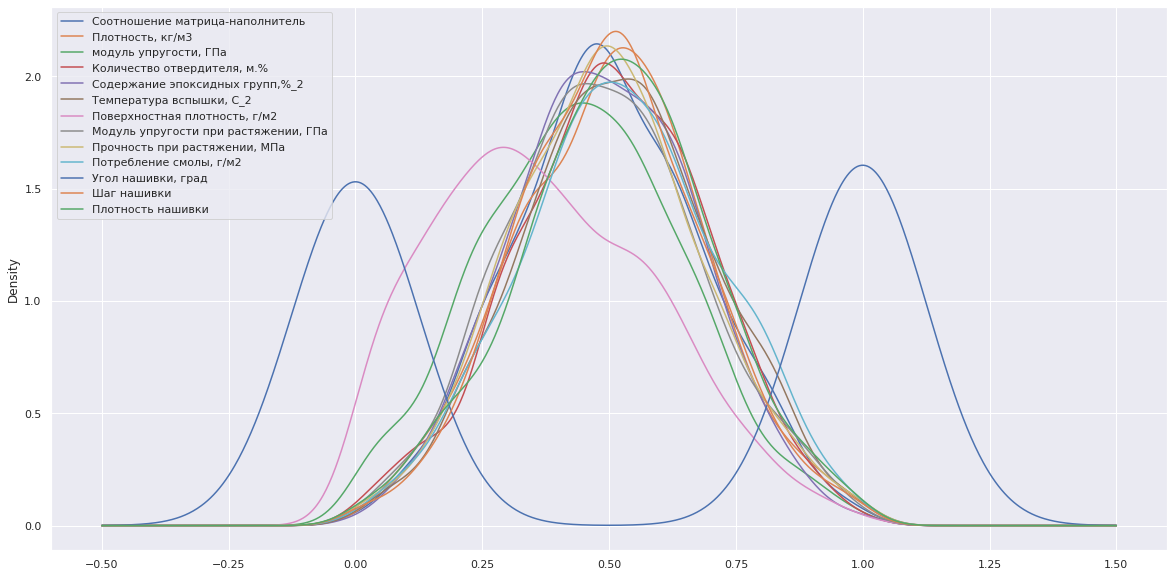

In [ ]:
# распредление после нормализации
plt_kde(df_n)

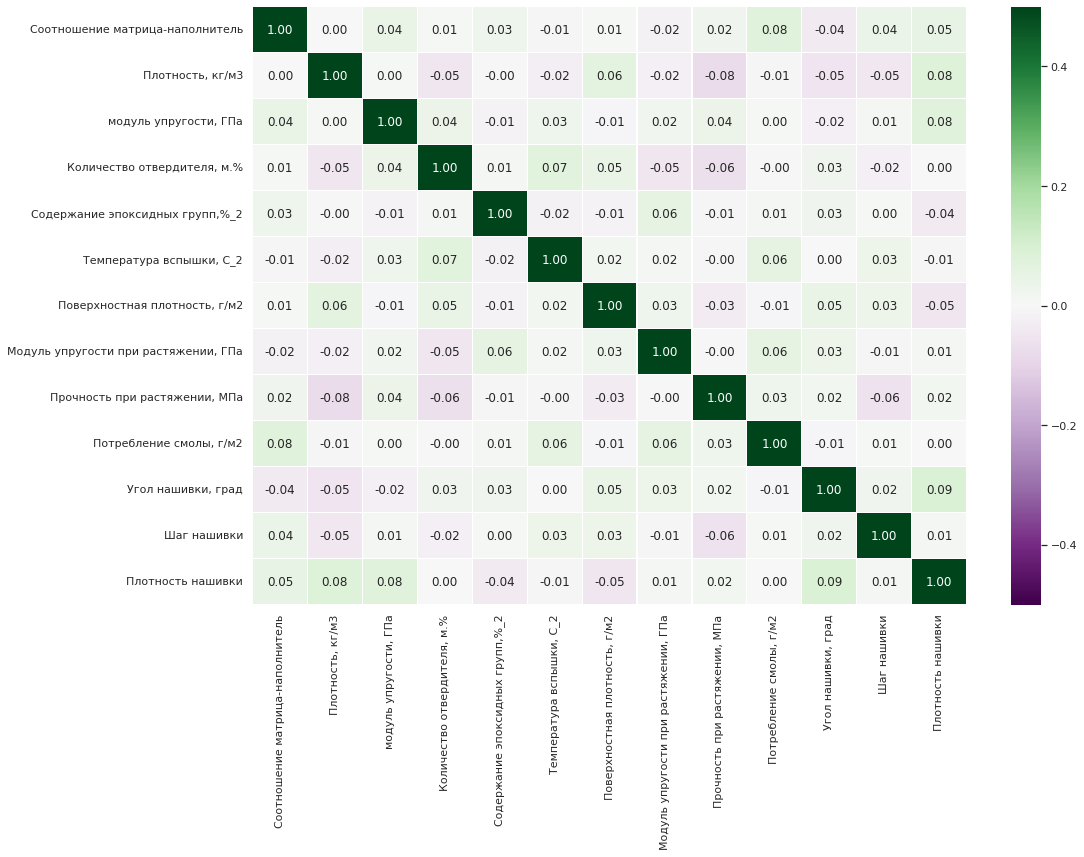

In [ ]:
# Корреялция после нормализации
get_corr(df_n)

##Модели для прогноза модуля упругости при растяжении и прочности при растяжении.


In [ ]:
#Визуализация предсказанных значений целевых переменных
def predicted_plot(y_test, y_pred, model_name):
  plt.figure(figsize=(15,9))
  plt.title(f'Тестовые и прогнозные значения, Модуль 1: {model_name}')
  plt.plot(y_test.to_numpy()[:,0], label='Тест')
  plt.plot(y_pred[:,0], label='Прогноз')
  plt.legend(loc='best')
  plt.ylabel('н')
  plt.xlabel('Порядок')

  plt.figure(figsize=(15,9))
  plt.title(f'Тестовые и прогнозные значения, Модуль 1: {model_name}')
  plt.plot(y_test.to_numpy()[:,1], label='Тест')
  plt.plot(y_pred[:,1], label='Прогноз')
  plt.legend(loc='best')
  plt.ylabel('н')
  plt.xlabel('Порядок')
# Для одной целевой переменной
def predicted_ns(y_test, y_pred):
  plt.figure(figsize=(15,9))
  plt.title(f'Тест и прогноз, Соотношение М-Н: ')
  plt.plot(y_test.to_numpy(), label='Тест')
  plt.plot(y_pred, label='Прогноз')
  plt.legend(loc='best')
  plt.ylabel('н')
  plt.xlabel('Порядок')

Входы и выходы для моделей

In [ ]:
# scaler_X = MinMaxScaler()
# scaler_y = MinMaxScaler() 
# y = scaler_y.fit_transform(df[y_label])
# X = scaler_X.fit_transform(df.drop(y_label, axis = 1))
y_label = ['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']
y = df_n[y_label] 
X = df_n.drop(y_label, axis = 1)
y.shape,X.shape

((936, 2), (936, 11))

In [ ]:
# scaler_y.inverse_transform(y)

Разделяем датасет на обучающую и тестовую выборки


In [ ]:
model_list = [] # список в котором будем хранить лучше модели
X_train, X_test, y_train,y_test = train_test_split(X, y , test_size=0.3, random_state=42)


Итоговый датасет ошибок


In [ ]:
loss_df = pd.DataFrame(columns=['target','model','MSE','R2'])


Линейная регрессия


In [ ]:
X_train.dropna().shape, X_train.shape

((655, 11), (655, 11))

In [ ]:
# модуль упругости при растяжении
del loss_df
loss_df =pd.DataFrame([])
model = LinearRegression()
model.fit(X_train,  y_train)
y_pred = model.predict(X_test)


model_name = 'Linear Regression'
def add_loss(loss_df, model_name):
  MSE = mean_squared_error(y_test, y_pred)
  R2 = r2_score(y_test, y_pred)
  df = pd.DataFrame({'model':model_name,\
                                'target':['Модуль упругости и Прочность'],\
                                'MSE':MSE,\
                                'R2':R2})
  # print(df.head())
  loss_df = pd.concat([loss_df, df],ignore_index=True)
  return loss_df
loss_df = add_loss(loss_df, model_name)
# loss_df 'Linear Regression'

In [ ]:
loss_df.head()

model                        target       MSE        R2
0  Linear Regression  Модуль упругости и Прочность  0.035074 -0.024522

Визуализация

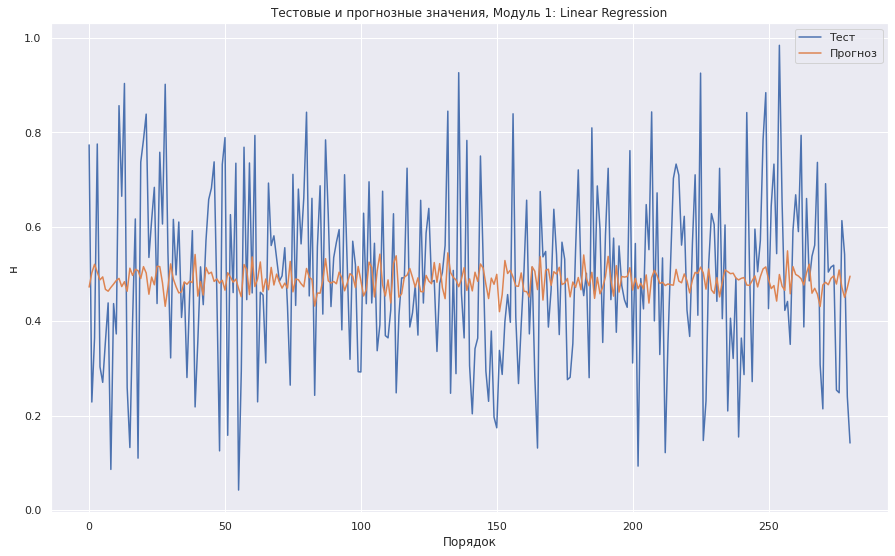

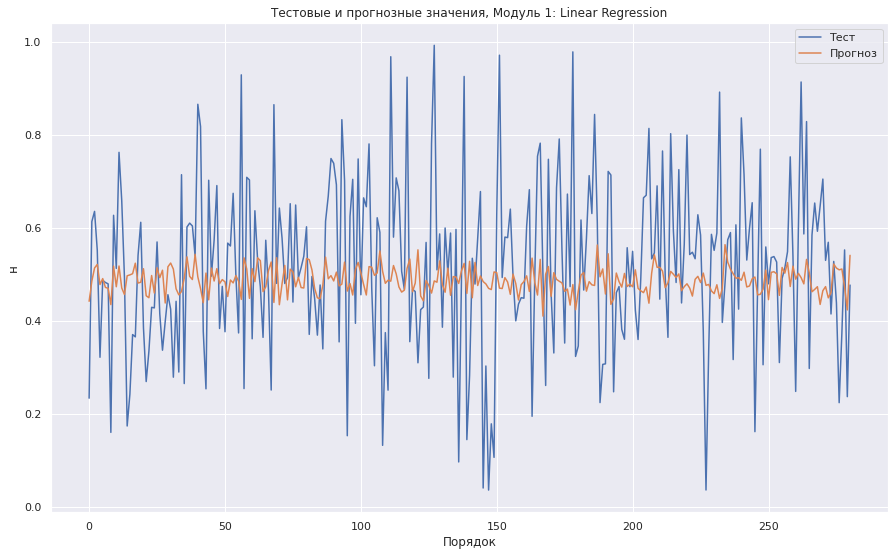

In [ ]:
predicted_plot(y_test, y_pred, model_name)

Регрессия k-ближайших соседей


In [ ]:

#model = KNeighborsRegressor(random_state = 42)
#random_seed(42)
model = KNeighborsRegressor()
grid = {'n_neighbors' : range(1, 101, 1), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }

gsc = GridSearchCV(model, grid, n_jobs=-1, cv=10,verbose = 1)
gsc.fit(X_train,  y_train)
model = gsc.best_estimator_
model.fit(X_train,  y_train)
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
model_name = 'KNeighborsRegressor'
model_list.append(model)
loss_df = add_loss(loss_df,model_name)
model

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


KNeighborsRegressor(n_neighbors=100)

Визуализация

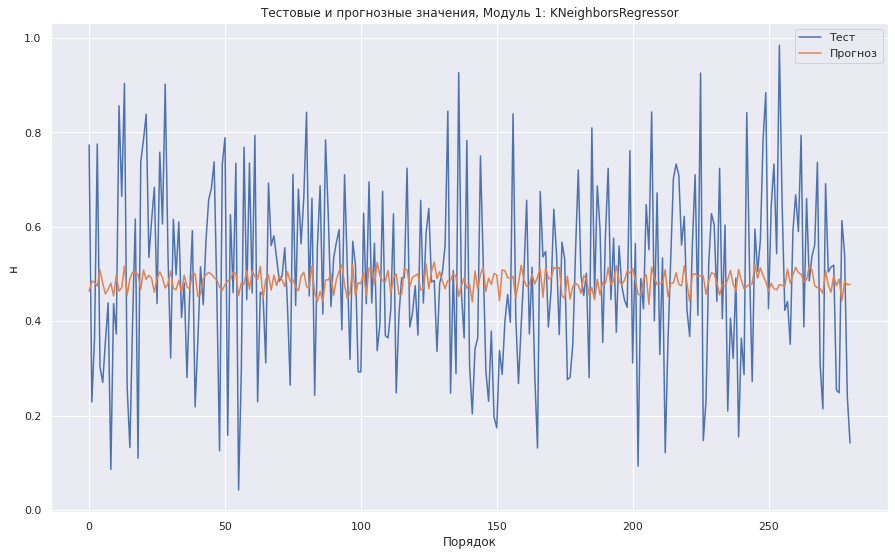

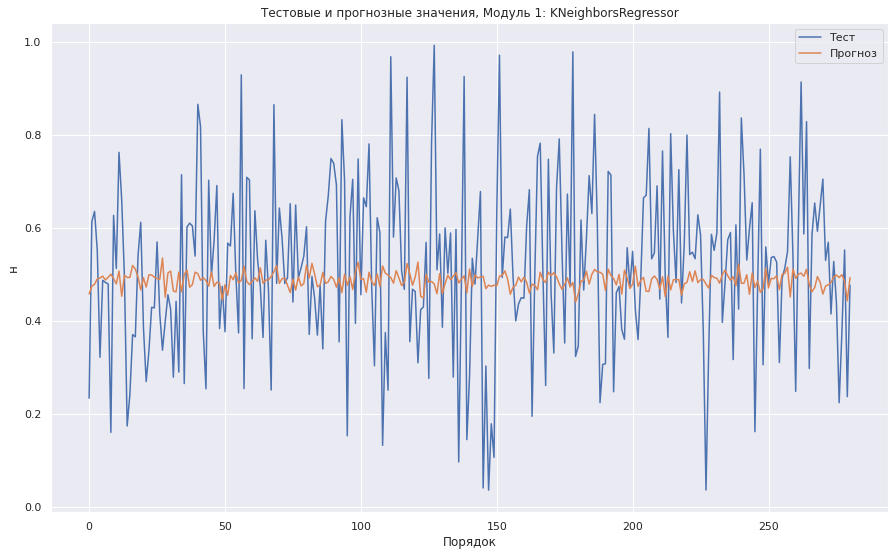

In [ ]:
predicted_plot(y_test, y_pred,model_name)

In [ ]:
loss_df.head()

model                        target       MSE        R2
0    Linear Regression  Модуль упругости и Прочность  0.035074 -0.024522
1  KNeighborsRegressor  Модуль упругости и Прочность  0.034788 -0.016102

SVR

MultiOutputRegressor(estimator=SVR(epsilon=0.5))

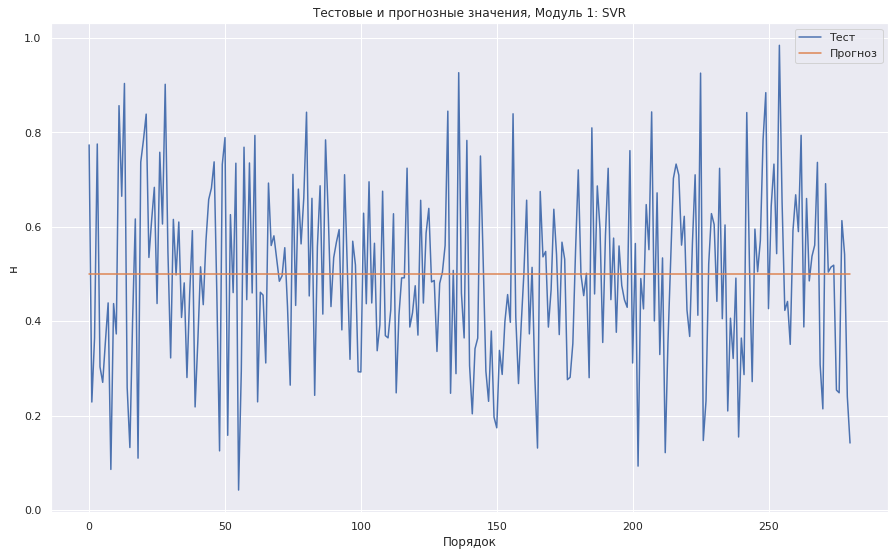

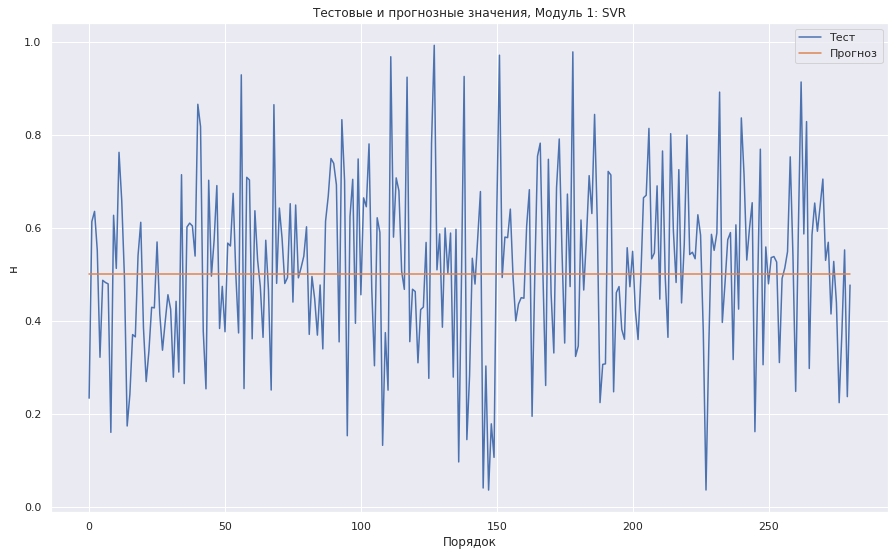

In [ ]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
grid = {
    'estimator__C':np.arange(1.0,5.5,0.5),
    'estimator__epsilon':np.arange(0.1,1.1,0.1)}

model = MultiOutputRegressor(SVR())
gsc = GridSearchCV(model, grid, n_jobs=-1, cv=10)
gsc.fit(X_train,  y_train)
model = gsc.best_estimator_
model.fit(X_train,  y_train)
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
model_name = 'SVR'
model_list.append(model)
loss_df = add_loss(loss_df,model_name)
predicted_plot(y_test, y_pred,model_name)
model

RandomForest

RandomForestRegressor(criterion='mse', max_depth=1, max_features='sqrt',
                      n_estimators=81, random_state=14)

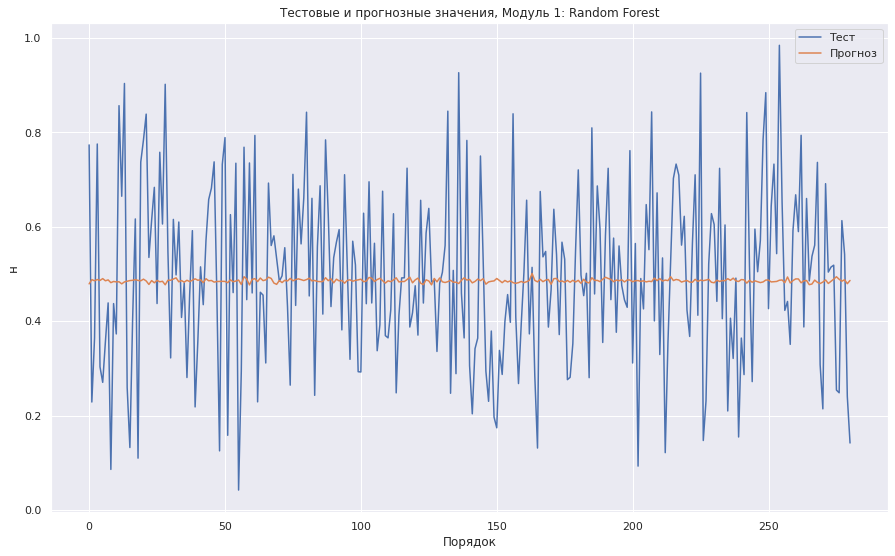

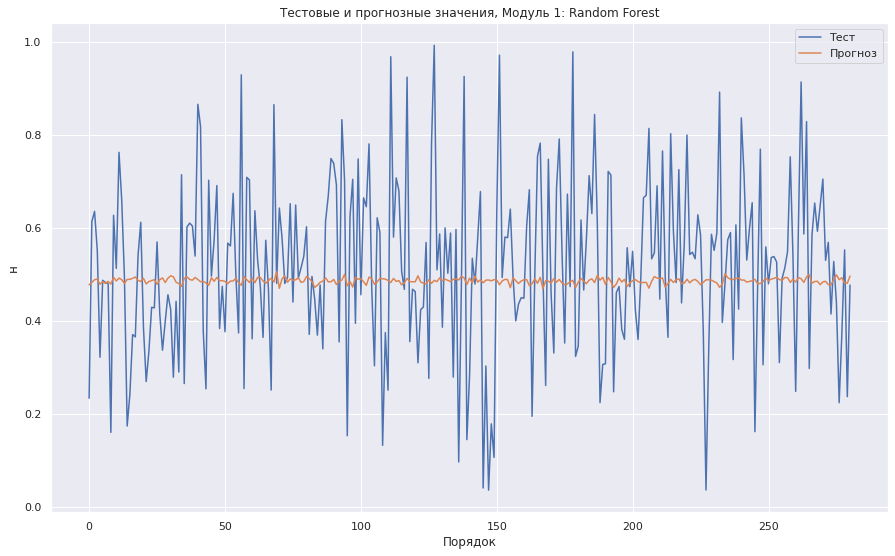

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# параметры для подстройки
model = RandomForestRegressor(random_state=14)
grid = {
    'n_estimators' : range(1, 100, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1, 5, 1),
    'criterion':['mse']
}

# модель для оптимизации
gsc = MultiOutputRegressor(model)
gsc = GridSearchCV(model, grid, n_jobs=-1, cv=10)
gsc.fit(X_train,  y_train)
model = gsc.best_estimator_
model.fit(X_train,  y_train)
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
model_name = 'Random Forest'
model_list.append(model)
loss_df = add_loss(loss_df,model_name)
predicted_plot(y_test, y_pred,model_name)
model

In [ ]:
loss_df

model                        target       MSE        R2
0    Linear Regression  Модуль упругости и Прочность  0.035074 -0.024522
1  KNeighborsRegressor  Модуль упругости и Прочность  0.034788 -0.016102
2                  SVR  Модуль упругости и Прочность  0.034403 -0.004750
3        Random Forest  Модуль упругости и Прочность  0.034912 -0.019703

Рекомендательная нейросеть для соотношения матрица-наполнитель


In [ ]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [ ]:
y = df_n['Соотношение матрица-наполнитель']
X = df_n.drop(['Соотношение матрица-наполнитель'], axis = 1)

X_train, X_test, y_train,y_test = train_test_split(X, y , test_size=0.3, random_state=42)
y.shape,X.shape

((936,), (936, 12))

In [ ]:
from keras.engine.sequential import Sequential
from keras import layers
from keras import models
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 1])
    plt.xlabel('Эпоха')

    plt.ylabel('MAE [MPG]')
    plt.legend()
    plt.grid(True)
model = Sequential()
model.add(layers.Dense(50, input_dim=X.shape[1], activation='relu'))
model.add(layers.Dropout(0.12))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.12))
model.add(layers.Dense(19, activation='relu'))
model.add(layers.Dropout(0.12))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.12))
model.add(layers.Dense(32, activation='softmax'))
model.add(layers.Dense(1))



In [ ]:
model.summary()
dfmodel = model.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=60)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                650       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               6528      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 19)                2451      
                                                                 
 dropout_2 (Dropout)         (None, 19)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                1

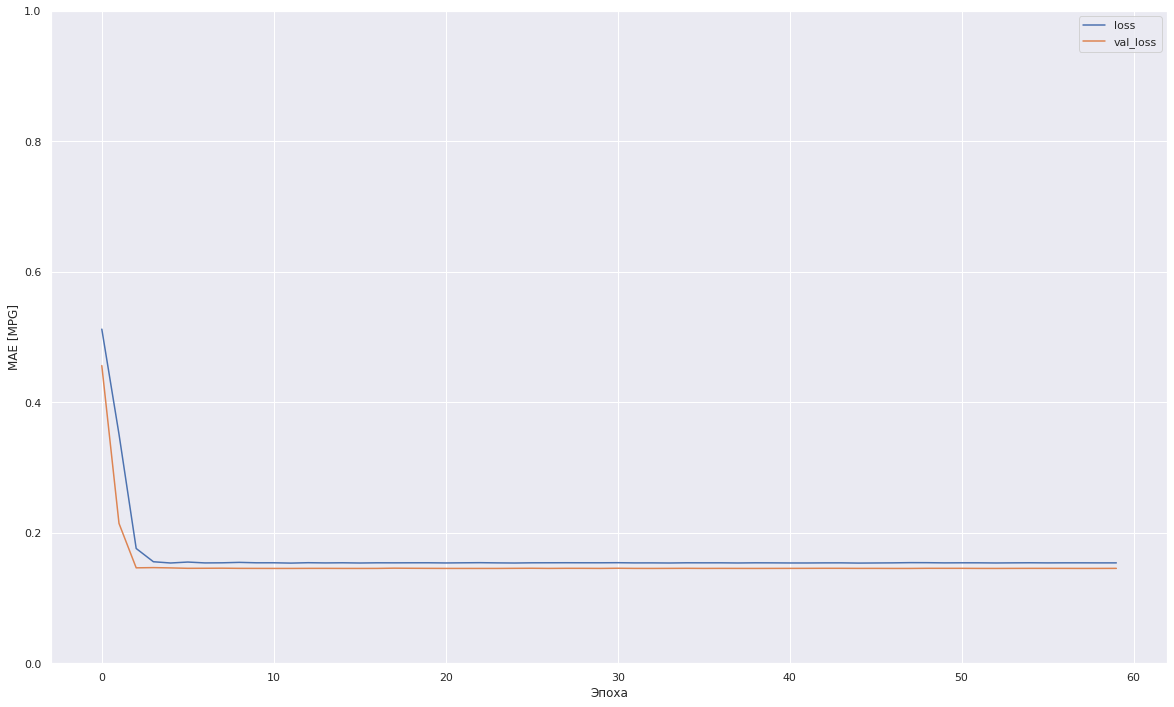

In [ ]:
plot_loss(history)

Визуализация


Оценка MSE


In [ ]:
model.evaluate(X_test, y_test, verbose=1)

9/9 [==============================] - 0s 2ms/step - loss: 0.1455 - mae: 0.1455


[0.14552554488182068, 0.14552554488182068]

Датасет с ошибками модели


In [ ]:
MSE = mean_squared_error(y_test, model.predict(X_test.values))
R2 = r2_score(y_test, model.predict(X_test.values))

print(f'MSE NN = {MSE}')
print(f'R2_score NN = {R2}')

9/9 [==============================] - 0s 2ms/step
MSE NN = 0.03355811961311786
R2_score NN = -0.0010706244792757502


In [ ]:
loss_df

model                        target       MSE        R2
0    Linear Regression  Модуль упругости и Прочность  0.035074 -0.024522
1  KNeighborsRegressor  Модуль упругости и Прочность  0.034788 -0.016102
2                  SVR  Модуль упругости и Прочность  0.034403 -0.004750
3        Random Forest  Модуль упругости и Прочность  0.034912 -0.019703

In [ ]:
for model in model_list:
  print(model)

KNeighborsRegressor(n_neighbors=100)
MultiOutputRegressor(estimator=SVR(epsilon=0.5))
RandomForestRegressor(criterion='mse', max_depth=1, max_features='sqrt',
                      n_estimators=81, random_state=14)


Для сохранения выбираем лучшую модель



In [ ]:
model = model_list[2]
from joblib import dump, load

dump(model, 'filename.joblib')

['filename.joblib']

In [ ]:
model_l = load('filename.joblib') 

In [ ]:
model_l

RandomForestRegressor(criterion='mse', max_depth=1, max_features='sqrt',
                      n_estimators=81, random_state=14)

In [ ]:
dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [ ]:
scaler_l = load('scaler.joblib')
scaler_l

MinMaxScaler()

Приложение

In [ ]:
from joblib import dump, load
def input_variable():

  x1 = float(input('Введите значение переменной Соотношение матрица-наполнитель: '))
  x2 = float(input('Введите значение переменной Плотность: '))
  x3 = float(input('Введите значение переменной Модуль упругости: '))
  x4 = float(input('Введите значение переменной Количество отвердителя: '))
  x5 = float(input('Введите значение переменной Содержание эпоксидных групп: '))
  x6 = float(input('Введите значение переменной Температура вспышки: '))
  x7 = float(input('Введите значение переменной Модуль упругости при растяжении: '))
  x8 = float(input('Введите значение переменной Потребление смолы: '))
  x9 = float(input('Введите значение переменной Угол нашивки: '))
  x10 = float(input('Введите значение переменной Шаг нашивки: '))
  x11 = float(input('Введите значение переменной Плотность нашивки: '))
  return x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11

def input_proc(X):
  print('вызов модели')
  X = list(X)
  X.append(1)
  X.append(1)
  res = model_l.predict(scaler_l.transform(np.array(X).reshape(1,-1))[:,:11])
  print(res)
  return res 

def app_model():

  model_l = load('filename.joblib') 
  scaler_l = load('scaler.joblib')
  print('Приложение прогнозирует значения модулей упругости и растяжения')
  y_out = [1,1,1,1,1,1,1,1,1,1,1]
  for i in range(110):
    try:
      print('введите 1 для прогноза, 2 для выхода')
      check = input()
      
      if check == '1':
        print('Введите данные')
        r =input_proc(input_variable())
        y_out.append(r[0][0])
        y_out.append(r[0][1])
        res = scaler_l.inverse_transform(np.array(y_out).reshape(1,-1))[:,11:]
        print(res)
      elif check == '2':
        break
      else:
        print('Повторите выбор')
    except:
      print('Неверные данные. Повторите операцию')
app_model()

Приложение прогнозирует значения модулей упругости и растяжения
введите 1 для прогноза, 2 для выхода
1
Введите данные
Введите значение переменной Соотношение матрица-наполнитель: 45
Введите значение переменной Плотность: 346
Введите значение переменной Модуль упругости: 65
Введите значение переменной Количество отвердителя: 456
Введите значение переменной Содержание эпоксидных групп: 334
Введите значение переменной Температура вспышки: 3344
Введите значение переменной Модуль упругости при растяжении: 66
Введите значение переменной Потребление смолы: 34
Введите значение переменной Угол нашивки: 53
Введите значение переменной Шаг нашивки: 63
Введите значение переменной Плотность нашивки: 436


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


вызов модели
[[0.48724438 0.49467212]]
[[ 6.71033639 56.32972039]]
введите 1 для прогноза, 2 для выхода
2
